In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [5]:
#Load raw dataset (training)
with open("dataset_training_raw.json", "r") as f:
    all_data = json.load(f)
del f

In [6]:
#The keys are "0.3 weighted", "0.7 weighted", "0.3 nonweighted", "0.7 nonweighted"
#Corresponds to probability of an edge in QAOA Hamiltonian using Erdos-Renyi graphs and whether the edge is weighted or not.
#The weights are drawn from a normal distribution of mean=0, stdev=1.

for dataset in all_data.values():
    no_samples = len(dataset)
    break

angles_30weighted = np.zeros((no_samples,6))
for s in range(no_samples):
    angles_30weighted[s,:] = all_data["0.3 weighted"][str(s)][1]
    angles_30weighted[s,:3] = np.mod( angles_30weighted[s, :3], np.pi/2 )
    angles_30weighted[s,3:] *= -1

angles_30nonweight = np.zeros((no_samples,6))
for s in range(no_samples):
    angles_30nonweight[s,:] = all_data["0.3 nonweighted"][str(s)][1]
    angles_30nonweight[s,:3] = np.mod( angles_30nonweight[s, :3], np.pi/2 )
    angles_30nonweight[s,3:] *= -1

angles_70weighted = np.zeros((no_samples,6))
for s in range(no_samples):
    angles_70weighted[s,:] = all_data["0.7 weighted"][str(s)][1]
    angles_70weighted[s,:3] = np.mod( angles_70weighted[s, :3], np.pi/2 )
    angles_70weighted[s,3:] *= -1

angles_70nonweight = np.zeros((no_samples,6))
for s in range(no_samples):
    angles_70nonweight[s,:] = all_data["0.7 nonweighted"][str(s)][1]
    angles_70nonweight[s,:3] = np.mod( angles_70nonweight[s, :3], np.pi/2 )
    angles_70nonweight[s,3:] *= -1

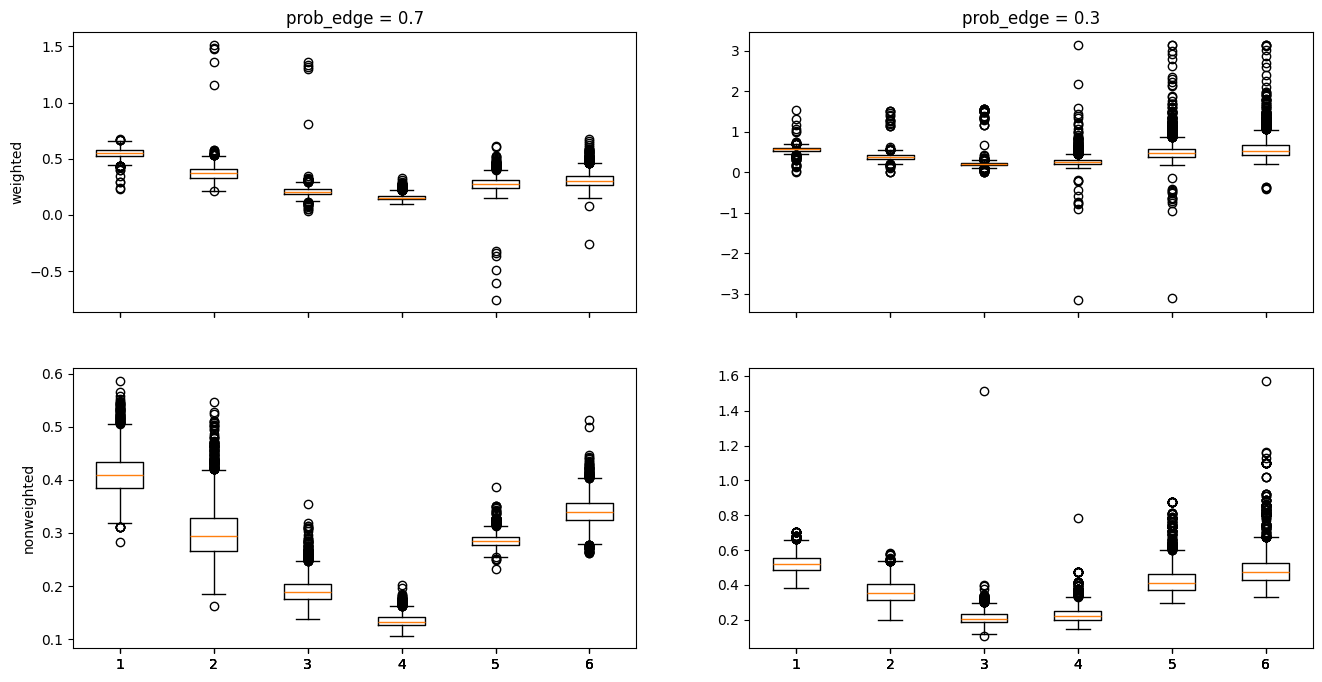

In [11]:
#Plot the distribution of optimised QAOA parameters along x-axis for each sample (6 parameters)
fig, axs = plt.subplots(2,2,sharex=True,sharey=False,figsize=(16,8))


axs[0,0].boxplot(angles_70weighted)
axs[0,0].set_title("prob_edge = 0.7")
axs[0,0].set_ylabel("weighted")

axs[0,1].boxplot(angles_30weighted)
axs[0,1].set_title("prob_edge = 0.3")
axs[1,0].boxplot(angles_70nonweight)
axs[1,0].set_ylabel("nonweighted")
axs[1,1].boxplot(angles_30nonweight)
plt.show()

(array([], dtype=int64), array([], dtype=int64))

15738


In [47]:
import random
#Split into training and validation set
samples = list(samples)
random.shuffle(list(samples))

In [53]:
training_set = samples[:6300]
validation_set = samples[6300:]